In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [2]:
rootpath = "D:/DataScience/Maitexa/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images"

In [3]:
for subfolder in os.listdir(rootpath): 
    for image in os.listdir(os.path.join(rootpath, subfolder)):
        image_path = os.path.join(rootpath, subfolder, image) 
        img = cv2.imread(image_path)


In [4]:
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [6]:
img.shape

(1200, 1600, 3)

In [7]:
#return a dataset that can be used for training
data = tf.keras.utils.image_dataset_from_directory(rootpath, image_size=(128,128))

Found 1835 files belonging to 30 classes.


In [8]:
#iterate through dataset
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

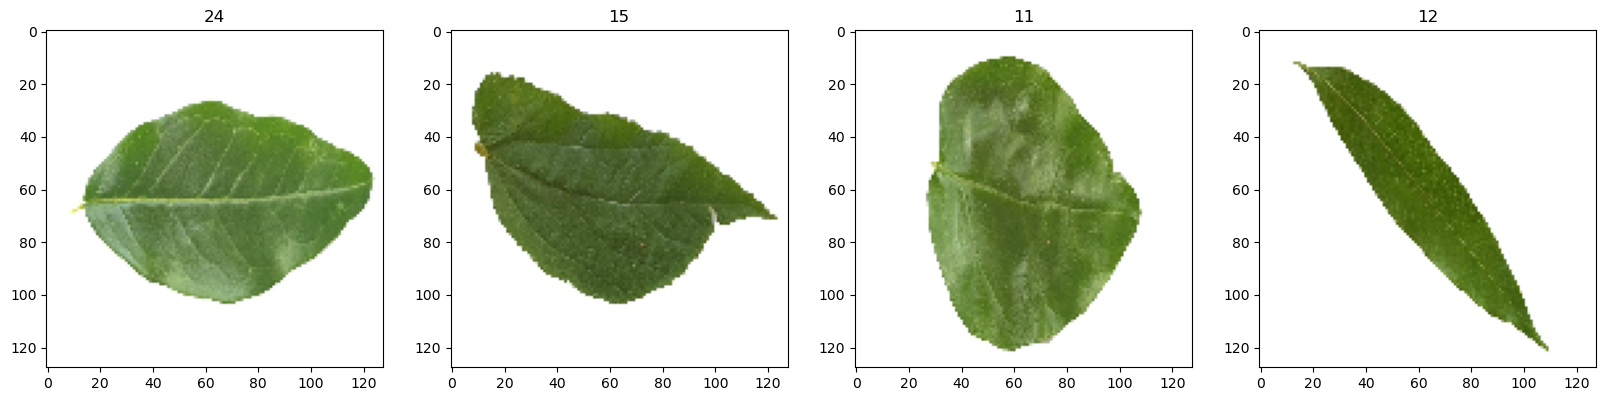

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [10]:
batch[0].max()

255.0

In [11]:
#sacle data
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         ...,
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],
 
 
        [

In [12]:
# sizes for train, validation, and test
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [13]:
# split dataset into tarin,validation adnd test
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [14]:
#input shape for CNN model
input_shape = (128, 128, 3)
inputs = Input((input_shape))

In [15]:
conv_1 = Conv2D(16, (3, 3), activation='relu')(inputs)
maxp_1 = MaxPooling2D()(conv_1)
conv_2 = Conv2D(32, (3, 3), activation='relu')(maxp_1)
maxp_2 = MaxPooling2D()(conv_2)
conv_3 = Conv2D(16, (3, 3), activation='relu')(maxp_2)
maxp_3 = MaxPooling2D()(conv_3)

# Flatten layer
flatten = Flatten()(maxp_3)

# Dense layers with dropout
dense_1 = Dense(256, activation='relu')(flatten)
dropout_1 = Dropout(0.3)(dense_1)

output = Dense(1, activation='sigmoid', name='output')(dropout_1)

# Create the model
model = Model(inputs=[inputs], outputs=[output])

model.compile(loss=['binary_crossentropy'], optimizer='adam', metrics=['accuracy'])

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        4624  

In [24]:
history = model.fit(train, epochs=22, validation_data=val)

Epoch 1/22
40/40 [==============================] - 6s 151ms/step - loss: -20946867978240.0000 - accuracy: 0.0711 - val_loss: -26493124083712.0000 - val_accuracy: 0.0426
Epoch 2/22
40/40 [==============================] - 6s 150ms/step - loss: -29818947108864.0000 - accuracy: 0.0711 - val_loss: -35208371896320.0000 - val_accuracy: 0.0710
Epoch 3/22
40/40 [==============================] - 6s 151ms/step - loss: -40351884640256.0000 - accuracy: 0.0664 - val_loss: -48393887940608.0000 - val_accuracy: 0.0511
Epoch 4/22
40/40 [==============================] - 6s 150ms/step - loss: -53765767954432.0000 - accuracy: 0.0680 - val_loss: -64418083766272.0000 - val_accuracy: 0.0398
Epoch 5/22
40/40 [==============================] - 7s 156ms/step - loss: -70009804029952.0000 - accuracy: 0.0711 - val_loss: -80648060534784.0000 - val_accuracy: 0.0597
Epoch 6/22
40/40 [==============================] - 6s 156ms/step - loss: -90385388929024.0000 - accuracy: 0.0688 - val_loss: -104163232972800.0000 - 

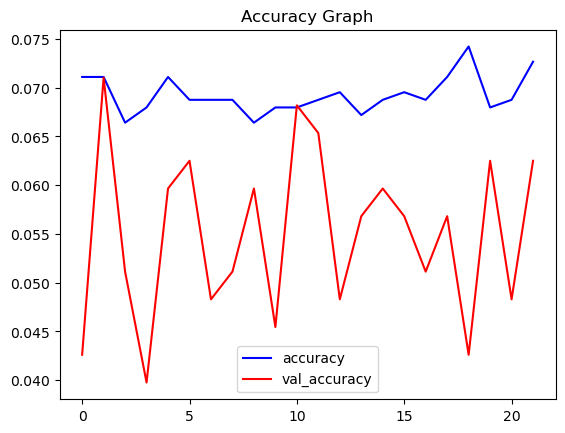

<Figure size 640x480 with 0 Axes>

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc, 'b',label='accuracy')
plt.plot(val_acc, 'r',label='val_accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()
plt.show()

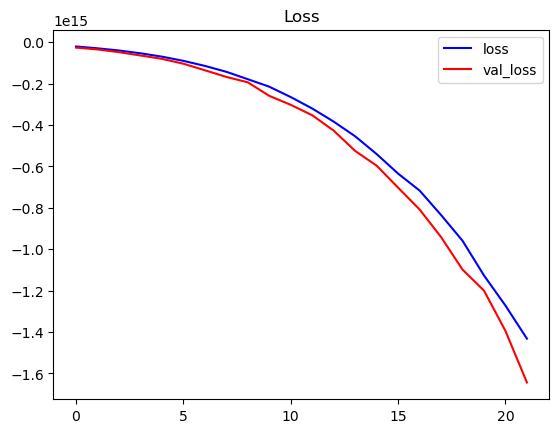

<Figure size 640x480 with 0 Axes>

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, 'b',label='loss')
plt.plot(val_loss, 'r',label='val_loss')
plt.title('Loss')
plt.legend()
plt.figure()
plt.show()


In [27]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [28]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    pred = model.predict(X)
    pre.update_state(y, pred)
    re.update_state(y, pred)
    acc.update_state(y, pred)

1/1 [==============================] - 0s 32ms/step


In [29]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.956250011920929, Recall: 1.0, Accuracy: 0.08124999701976776
